In [1]:
#https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Data/admission_data.csv')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [6]:
#check if only 0 or 1 in this column
df['Research'].isin([0,1]).all()

True

<h1> Histogram and boxplot </h1>

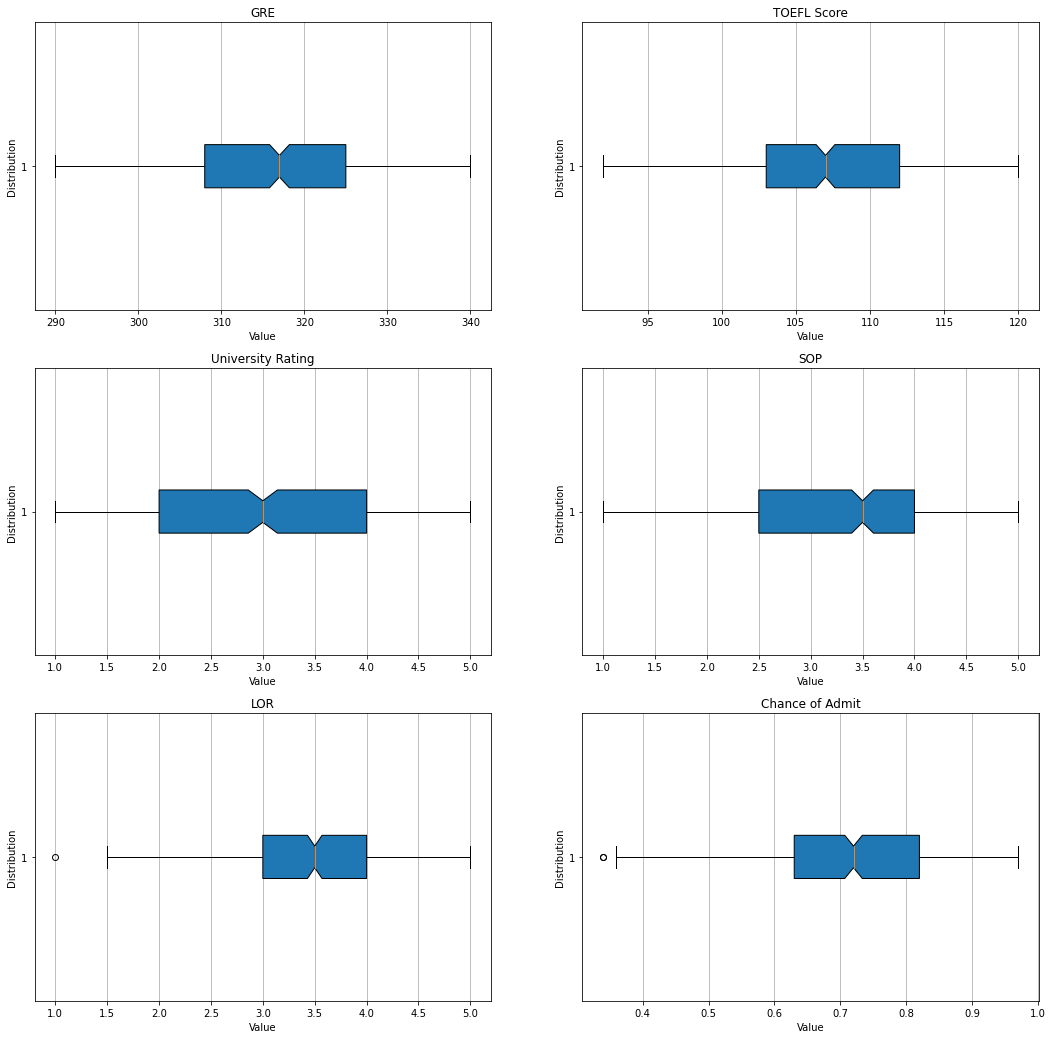

In [7]:
fig1, ax1 = plt.subplots(3,2, figsize=(18, 18))

for ax in ax1:
    for ax in ax:
        ax.set(
        axisbelow=True,  # Hide the grid behind plot objects
        ylabel='Distribution',
        xlabel='Value',
        )
        ax.xaxis.grid(True),

ax1[0,0].boxplot(df['GRE Score'],patch_artist = True, notch ='True', vert = 0)
ax1[0,0].set_title('GRE')

ax1[0,1].boxplot(df['TOEFL Score'],patch_artist = True, notch ='True', vert = 0)
ax1[0,1].set_title('TOEFL Score')

ax1[1,0].boxplot(df['University Rating'],patch_artist = True, notch ='True', vert = 0)
ax1[1,0].set_title('University Rating')

ax1[1,1].boxplot(df['SOP'],patch_artist = True, notch ='True', vert = 0)
ax1[1,1].set_title('SOP')

ax1[2,0].boxplot(df['LOR '],patch_artist = True, notch ='True', vert = 0)
ax1[2,0].set_title('LOR')

ax1[2,1].boxplot(df['Chance of Admit '],patch_artist = True, notch ='True', vert = 0)
ax1[2,1].set_title('Chance of Admit')

plt.show()

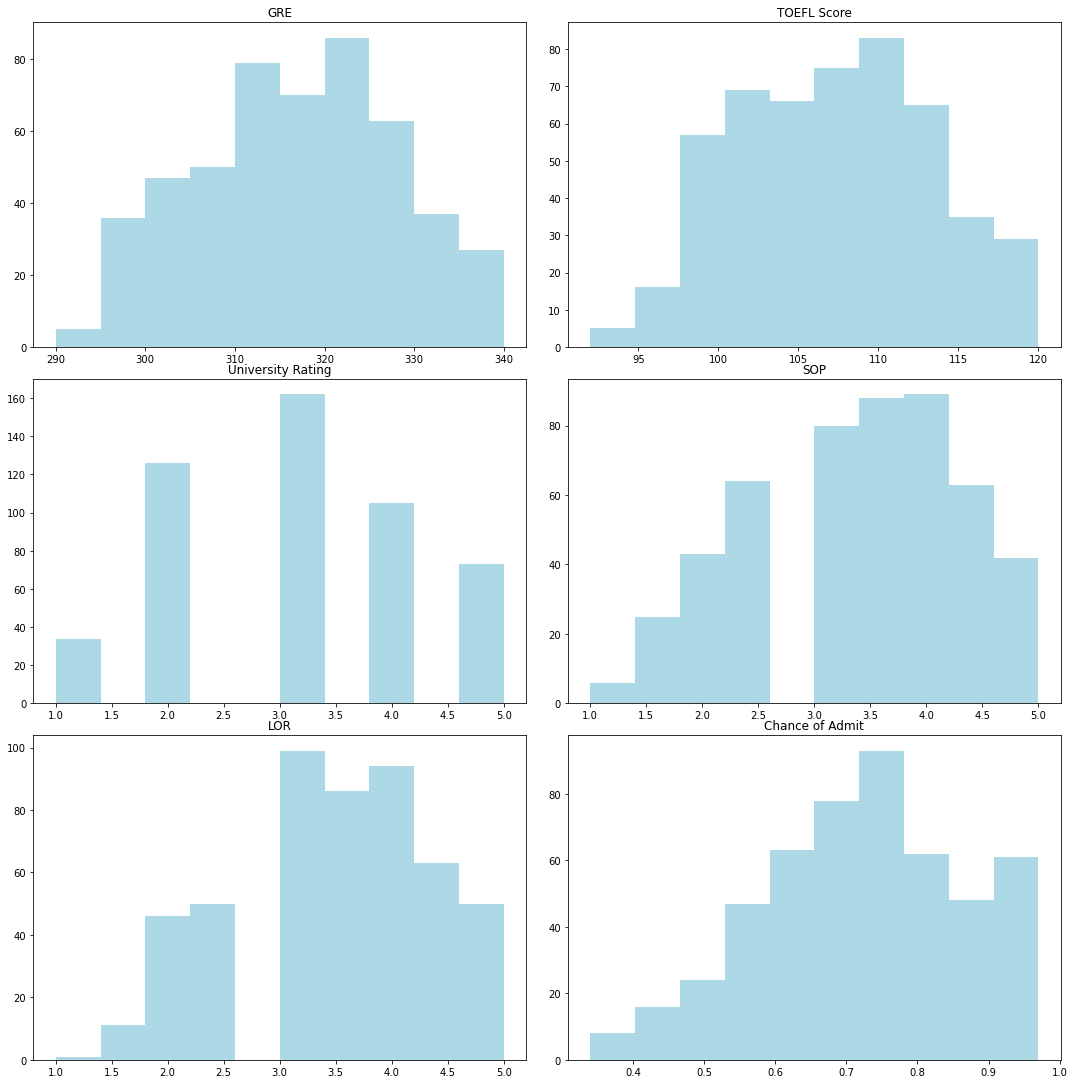

In [8]:
fig2, ax2 = plt.subplots(3,2, figsize=(15, 15))
plt.tight_layout()


ax2[0,0].hist(df['GRE Score'],color = ['lightblue'])
ax2[0,0].set_title('GRE')

ax2[0,1].hist(df['TOEFL Score'],color = ['lightblue'])
ax2[0,1].set_title('TOEFL Score')

ax2[1,0].hist(df['University Rating'],color = ['lightblue'])
ax2[1,0].set_title('University Rating')

ax2[1,1].hist(df['SOP'],color = ['lightblue'])
ax2[1,1].set_title('SOP')

ax2[2,0].hist(df['LOR '],color = ['lightblue'])
ax2[2,0].set_title('LOR')

ax2[2,1].hist(df['Chance of Admit '],color = ['lightblue'])
ax2[2,1].set_title('Chance of Admit')

plt.show()

<h1>Relationship between values</h1>

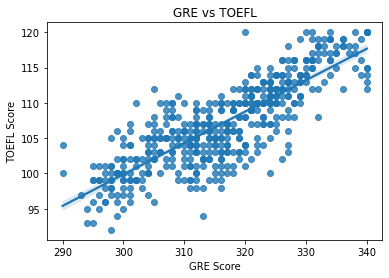

In [9]:
fig3 = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title('GRE vs TOEFL')

plt.show()

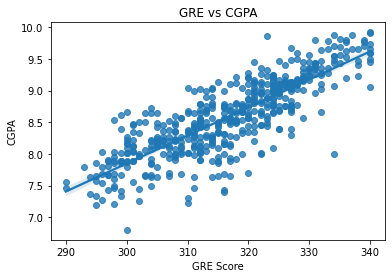

In [10]:
fig3 = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title('GRE vs CGPA')

plt.show()

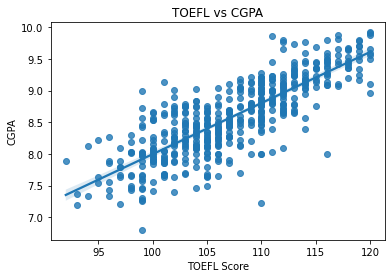

In [11]:
fig3 = sns.regplot(x="TOEFL Score", y="CGPA", data=df)
plt.title('TOEFL vs CGPA')

plt.show()

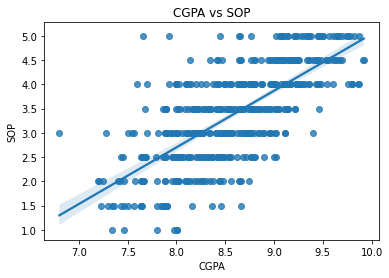

In [12]:
fig3 = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title('CGPA vs SOP')

plt.show()

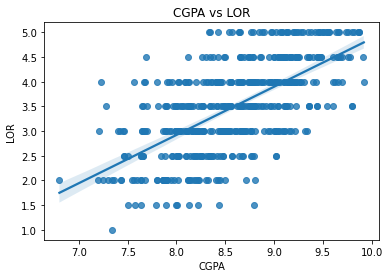

In [13]:
fig3 = sns.regplot(x="CGPA", y="LOR ", data=df)
plt.title('CGPA vs LOR')

plt.show()

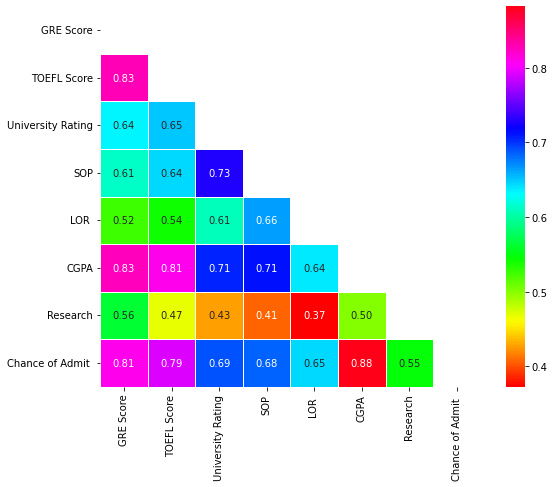

In [14]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

<h1>Machine Learning</h1>

Regression models

In [15]:
X= df.iloc[:,:-1]
y = df['Chance of Admit ']

In [16]:
X,y

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 0          337          118                  4  4.5   4.5  9.65         1
 1          324          107                  4  4.0   4.5  8.87         1
 2          316          104                  3  3.0   3.5  8.00         1
 3          322          110                  3  3.5   2.5  8.67         1
 4          314          103                  2  2.0   3.0  8.21         0
 ..         ...          ...                ...  ...   ...   ...       ...
 495        332          108                  5  4.5   4.0  9.02         1
 496        337          117                  5  5.0   5.0  9.87         1
 497        330          120                  5  4.5   5.0  9.56         1
 498        312          103                  4  4.0   5.0  8.43         0
 499        327          113                  4  4.5   4.5  9.04         0
 
 [500 rows x 7 columns],
 0      0.92
 1      0.76
 2      0.72
 3      0.80
 4      0.65
        

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [18]:
X_norm=preprocessing.normalize(X)
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.2,random_state=101)

In [19]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

In [20]:
reg_models = [
    ['Ada Boost Regression: ',AdaBoostRegressor()],
    ['Extra Trees Regression: ', ExtraTreesRegressor()],
    ['Linear Regression:', LinearRegression()],
    ['Decision Tree Regressor: ', DecisionTreeRegressor()],
    ['Random Forest Regressor: ', RandomForestRegressor()],
    ['KNeighbors Regressor: ', KNeighborsRegressor()],
    ['SVR: ', SVR()]
]
mse_dict = []
for name,model in reg_models:
    model = model
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test,predict))
    mse_dict.append(mse)
    print(name,mse)

Ada Boost Regression:  0.08233495912982897
Extra Trees Regression:  0.07421076000149841
Linear Regression: 0.07765759656302856
Decision Tree Regressor:  0.11032225523438141
Random Forest Regressor:  0.07609175645232537
KNeighbors Regressor:  0.08882567196480981
SVR:  0.11746039395819052


[Text(0.5, 0, 'Mean Squared Error')]

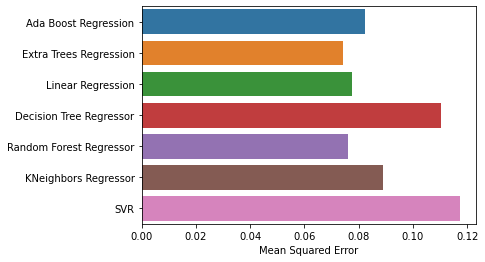

In [21]:
mse_names=['Ada Boost Regression','Extra Trees Regression','Linear Regression','Decision Tree Regressor','Random Forest Regressor',
          'KNeighbors Regressor','SVR']

ax = sns.barplot(x = mse_dict,y = mse_names)
ax.set(xlabel='Mean Squared Error')

Best regression model

In [22]:
r_model = ExtraTreesRegressor()
r_model.fit(X_train,y_train)

ExtraTreesRegressor()

In [23]:
predict = r_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,predict))

0.07457431930631349

In [24]:
pred1 = np.array([[338,118,1,4.5,4.5,9.6,1]])
pred1 = preprocessing.normalize(pred1)
r_model.predict(pred1)

array([0.8344])

Save regression model

In [25]:
import pickle

In [26]:
data = r_model
with open('r_model.pkl','wb') as file:
    pickle.dump(data,file)

In [27]:
with open("r_model.pkl","rb") as file:
    saved_r_model = pickle.load(file)


In [28]:
saved_r_model.predict(pred1)

array([0.8344])

Classification models

In [29]:
df.loc[df['Chance of Admit '] > 0.75, 'Chance of Admit '] = 1

In [30]:
df.loc[df['Chance of Admit '] < 0.75, 'Chance of Admit '] = 0

In [31]:
X = df.iloc[:,:-1]
y=df['Chance of Admit ']

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [34]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [35]:
reg_models = [['Logistic Regression :',LogisticRegression(max_iter=1000)],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
acc_dic = []
for name,model in reg_models:
    model = model
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test,predict)
    acc_dic.append(acc)
    print(name,acc)

Logistic Regression : 0.92
Decision Tree Classification : 0.9
Random Forest Classification : 0.87
Gradient Boosting Classification : 0.88
K-Neighbors Classification : 0.88
Support Vector Classification : 0.84
Gaussian Naive Bayes : 0.91


[Text(0.5, 0, 'Accuracy score')]

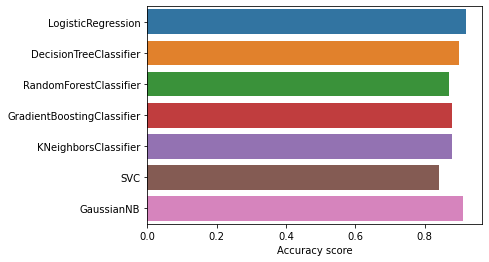

In [36]:
acc_names=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier',
          'KNeighborsClassifier','SVC','GaussianNB']

ax = sns.barplot(x = acc_dic,y = acc_names)
ax.set(xlabel='Accuracy score')

Best classification model

In [37]:
cl_model = LogisticRegression()
cl_model.fit(X_train.values,y_train)


C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
final_predict = cl_model.predict(X_test.values)
accuracy_score(y_test,final_predict)

0.91

In [39]:
pred1 = np.array([[337,118,1,4,4,9,1]])
cl_model.predict(pred1)

array([1])

In [40]:
pred2 = np.array([[300,100,5,3,3,8,1]])
cl_model.predict(pred2)

array([0])

Save

In [41]:
import pickle

In [42]:
data = cl_model
with open('cl_model.pkl','wb') as file:
    pickle.dump(data,file)

In [43]:
with open("cl_model.pkl","rb") as file:
    saved_cl_model = pickle.load(file)


In [44]:
saved_cl_model.predict(pred1)

array([1])